<a href="https://colab.research.google.com/github/wlail-iu/D590-NLP-F24/blob/main/WLail_Week_11_Speech_Recognition_Scrivner_D590_NLP_Fall24(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Visualizing Speech Recognition

In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.io.wavfile import write

In [ ]:
# Read the audio file
# unzip the speech_data.zip folder, within that, you'll find all required audio and JSON files
sampling_freq, signal = wavfile.read('/content/spoken_word.wav')

In [ ]:
# Display the params
print('\nSignal shape:', signal.shape)
print('Datatype:', signal.dtype)
print('Signal duration:', round(signal.shape[0] / float(sampling_freq), 2), 'seconds')


Signal shape: (3251,)
Datatype: int16
Signal duration: 0.41 seconds


In [ ]:
# Normalize the signal
signal = signal / np.power(2, 15)

In [ ]:
# Extract the first 50 values
signal = signal[:50]

In [ ]:
# Construct the time axis in milliseconds
time_axis = 1000 * np.arange(0, len(signal), 1) / float(sampling_freq)

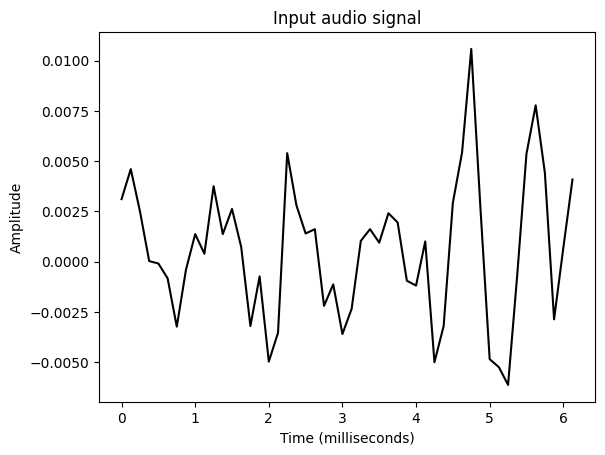

In [ ]:
# Plot the audio signal
plt.plot(time_axis, signal, color='black')
plt.xlabel('Time (milliseconds)')
plt.ylabel('Amplitude')
plt.title('Input audio signal')
plt.show()

## Transforming audio signals to the frequency domain

In [ ]:
# Extract the length of the audio signal
len_signal = len(signal)

# Extract the half length
len_half = np.ceil((len_signal + 1) / 2.0).astype(int)

In [ ]:
# Apply Fourier transform
freq_signal = np.fft.fft(signal)

In [ ]:
# Normalization
freq_signal = abs(freq_signal[0:len_half]) / len_signal

# Take the square
freq_signal **= 2

In [ ]:
# Extract the length of the frequency transformed signal
len_fts = len(freq_signal)

# Adjust the signal for even and odd cases
if len_signal % 2:
  freq_signal[1:len_fts] *= 2

else:
  freq_signal[1:len_fts-1] *= 2

In [ ]:
# Extract the power value in dB
signal_power = 10 * np.log10(freq_signal)

In [ ]:
# Build the X axis
x_axis = np.arange(0, len_half, 1) * (sampling_freq / len_signal) / 1000.0

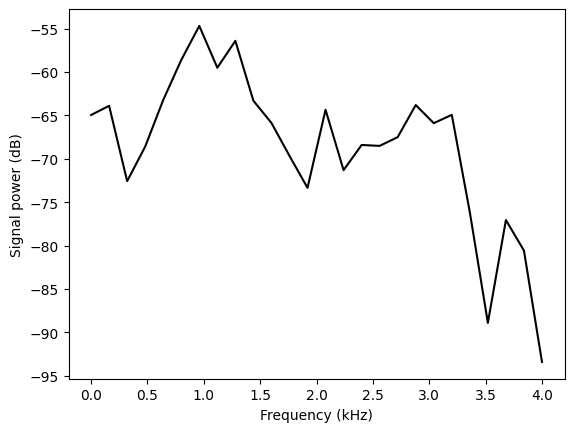

In [ ]:
# Plot the figure
plt.figure()
plt.plot(x_axis, signal_power, color='black')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Signal power (dB)')
plt.show()

## Generating audio signals

In [ ]:
# Output file where the audio will be saved
output_file = '/content/generated_audio.wav'

In [ ]:
# Specify audio parameters
duration = 4 # in seconds
sampling_freq = 44100 # in Hz
tone_freq = 784
min_val = -4 * np.pi
max_val = 4 * np.pi

In [ ]:
# Generate the audio signal
t = np.linspace(min_val, max_val, duration * sampling_freq)
signal = np.sin(2 * np.pi * tone_freq * t)

In [ ]:
# Add some noise to the signal
noise = 0.5 * np.random.rand(duration * sampling_freq)
signal += noise

In [ ]:
# Scale it to 16-bit integer values
scaling_factor = np.power(2, 15) - 1
signal_normalized = signal / np.max(np.abs(signal))
signal_scaled = np.int16(signal_normalized * scaling_factor)

In [ ]:
# Save the audio signal in the output file
write(output_file, sampling_freq, signal_scaled)

In [ ]:
# Extract the first 200 values from the audio signal
signal = signal[:200]

In [ ]:
# Construct the time axis in milliseconds
time_axis = 1000 * np.arange(0, len(signal), 1) / float(sampling_freq)

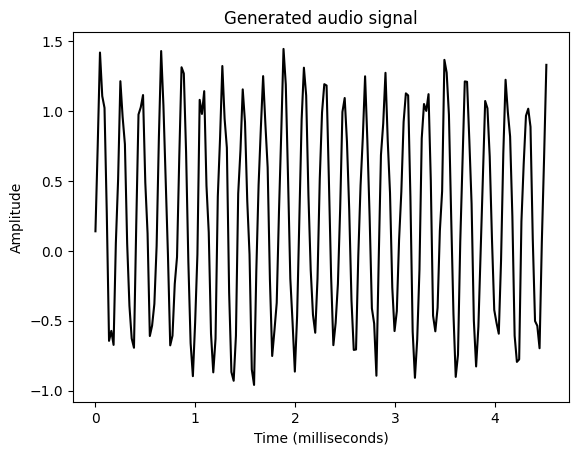

In [ ]:
# Plot the audio signal
plt.plot(time_axis, signal, color='black')
plt.xlabel('Time (milliseconds)')
plt.ylabel('Amplitude')
plt.title('Generated audio signal')
plt.show()

## Synthesizing tones to generate music

In order to see the frequency mapping for these standard tones, check out this link:<br> http://www.phy.mtu.edu/~suits/notefre-qs.html.

In [ ]:
# Synthesize the tone based on the input parameters
def tone_synthesizer(freq, duration, amplitude=1.0, sampling_freq=44100):
  # Construct the time axis
  time_axis = np.linspace(int(0), int(duration), int(duration) * int(sampling_freq))

  # Construct the audio signal
  signal = amplitude * np.sin(2 * np.pi * freq * time_axis)
  return signal.astype(np.int16)

if __name__=='__main__':
  # Names of output files
  file_tone_single = 'generated_tone_single.wav'
  file_tone_sequence = 'generated_tone_sequence.wav'

In [ ]:
# Source: http://www.phy.mtu.edu/~suits/notefreqs.html
mapping_file = '/content/tone_mapping.json'

# Load the tone to frequency map from the mapping file
with open(mapping_file, 'r') as f:
  tone_map = json.loads(f.read())

In [ ]:
# Set input parameters to generate 'F' tone
tone_name = 'F'
# seconds
duration = 3
# amplitude
amplitude = 12000
# Hz
sampling_freq = 44100

In [ ]:
# Extract the tone frequency
tone_freq = tone_map[tone_name]

In [ ]:
# Generate the tone using the above parameters
synthesized_tone = tone_synthesizer(tone_freq, duration, amplitude, sampling_freq)

In [ ]:
# Write the audio signal to the output file
write(file_tone_single, sampling_freq, synthesized_tone)

In [ ]:
# Define the tone sequence along with corresponding
# durations in seconds
tone_sequence = [('G', 0.4), ('D', 0.5), ('F', 0.3), ('C', 0.6), ('A', 0.4)]

In [ ]:
# Construct the audio signal based on the above sequence
signal = np.array([])
for item in tone_sequence:
  # Get the name of the tone
  tone_name = item[0]

  # Extract the corresponding frequency of the tone
  freq = tone_map[tone_name]

  # Extract the duration
  duration = item[1]

  # Synthesize the tone
  synthesized_tone = tone_synthesizer(freq, duration, amplitude, sampling_freq)

  # Append the output signal
  signal = np.append(signal, synthesized_tone, axis=0)

# Save the audio in the output file
write(file_tone_sequence, sampling_freq, signal)

## Extracting speech features

In [ ]:
!pip install python_speech_features

  Preparing metadata (setup.py) ... done
  Created wheel for python_speech_features: filename=python_speech_features-0.6-py3-none-any.whl size=5868 sha256=c133f8bd1c68556b388713723465ca12b6ea42c9d4cc3fd030fe85ec8e8340b9
  Stored in directory: /root/.cache/pip/wheels/5a/9e/68/30bad9462b3926c29e315df16b562216d12bdc215f4d240294
Successfully built python_speech_features


In [ ]:
#!pip install python_speech_features
from python_speech_features import mfcc, logfbank

In [ ]:
# Read the input audio file
sampling_freq, signal = wavfile.read('/content/random_sound.wav')

# Take the first 10,000 samples for analysis
signal = signal[:10000]

In [ ]:
# Extract the MFCC features
features_mfcc = mfcc(signal, sampling_freq)

# Print the parameters for MFCC
print('\nMFCC:\nNumber of windows =', features_mfcc.shape[0])
print('Length of each feature =', features_mfcc.shape[1])


MFCC:
Number of windows = 22
Length of each feature = 13


Text(0.5, 1.0, 'MFCC')

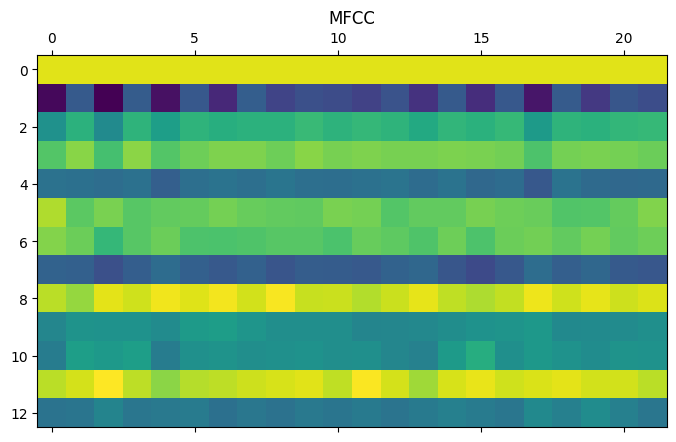

In [ ]:
# Plot the features
features_mfcc = features_mfcc.T
plt.matshow(features_mfcc)
plt.title('MFCC')

In [ ]:
# Extract the Filter Bank features
features_fb = logfbank(signal, sampling_freq)

# Print the parameters for Filter Bank
print('\nFilter bank:\nNumber of windows =', features_fb.shape[0])
print('Length of each feature =', features_fb.shape[1])


Filter bank:
Number of windows = 22
Length of each feature = 26


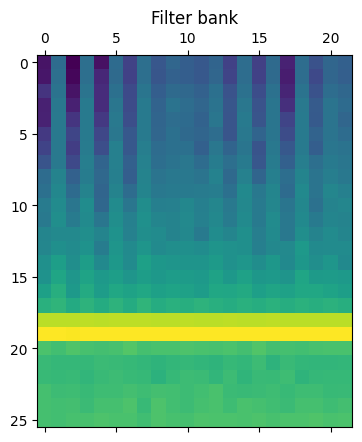

In [ ]:
# Plot the features
features_fb = features_fb.T
plt.matshow(features_fb)
plt.title('Filter bank')

plt.show()

## Recognizing spoken words

- Speech recognition systems take audio signals as input and recognize the words being spoken. Hidden Markov Models (HMMs) will be used for this task.
- HMMs are great at analyzing sequential data. An audio signal is a time series signal, which is a manifestation of sequential data.
- The assumption is that the outputs are being generated by the system going through a series of hidden states. Our goal is to find out what these hidden states are so that we can identify the words in our signal.

In [ ]:
!pip install hmmlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.6/164.6 kB 3.6 MB/s eta 0:00:00


In [ ]:
# !pip3 install hmmlearn
import os
import argparse
import warnings

from hmmlearn import hmm
from python_speech_features import mfcc

In [ ]:
# # Define a function to parse the input arguments
# def build_arg_parser():
#   parser = argparse.ArgumentParser(description='Trains the HMM-based speech recognition')
#   parser.add_argument("--input-folder", dest="input_folder", required=True, help="Input
#   return parser

In [ ]:
# Define a class to train the HMM
class ModelHMM(object):
    def __init__(self, num_components=4, num_iter=1000):
        self.n_components = num_components
        self.n_iter = num_iter

        self.cov_type = 'diag'
        self.model_name = 'GaussianHMM'

        self.models = []

        self.model = hmm.GaussianHMM(n_components=self.n_components,
                covariance_type=self.cov_type, n_iter=self.n_iter)

    # 'training_data' is a 2D numpy array where each row is 13-dimensional
    def train(self, training_data):
        np.seterr(all='ignore')
        cur_model = self.model.fit(training_data)
        self.models.append(cur_model)

    # Run the HMM model for inference on input data
    def compute_score(self, input_data):
        return self.model.score(input_data)

In [ ]:
# Define a function to build a model for each word
def build_models(input_folder):
    # Initialize the variable to store all the models
    speech_models = []

    # Parse the input directory
    for dirname in os.listdir(input_folder):
        # Get the name of the subfolder
        subfolder = os.path.join(input_folder, dirname)

        if not os.path.isdir(subfolder):
            continue

        # Extract the label
        label = subfolder[subfolder.rfind('/') + 1:]

        # Initialize the variables
        X = np.array([])

        # Create a list of files to be used for training
        # We will leave one file per folder for testing
        training_files = [x for x in os.listdir(subfolder) if x.endswith('.wav')][:-1]

        # Iterate through the training files and build the models
        for filename in training_files:
            # Extract the current filepath
            filepath = os.path.join(subfolder, filename)

            # Read the audio signal from the input file
            sampling_freq, signal = wavfile.read(filepath)

            # Extract the MFCC features
            with warnings.catch_warnings():
                warnings.simplefilter('ignore')
                features_mfcc = mfcc(signal, sampling_freq)

            # Append to the variable X
            if len(X) == 0:
                X = features_mfcc
            else:
                X = np.append(X, features_mfcc, axis=0)

        # Create the HMM model
        model = ModelHMM()

        # Train the HMM
        model.train(X)

        # Save the model for the current word
        speech_models.append((model, label))

        # Reset the variable
        model = None

    return speech_models

In [ ]:
# Define a function to run tests on input files
def run_tests(test_files):
    # Classify input data
    for test_file in test_files:
        # Read input file
        sampling_freq, signal = wavfile.read(test_file)

        # Extract MFCC features
        with warnings.catch_warnings():
            warnings.simplefilter('ignore')
            features_mfcc = mfcc(signal, sampling_freq)

        # Define variables
        max_score = -float('inf')
        output_label = None

        # Run the current feature vector through all the HMM
        # models and pick the one with the highest score
        for item in speech_models:
            model, label = item
            score = model.compute_score(features_mfcc)
            if score > max_score:
                max_score = score
                predicted_label = label

        # Print the predicted output
        start_index = test_file.find('/') + 1
        end_index = test_file.rfind('/')
        original_label = test_file[start_index:end_index]
        print('\nOriginal: ', original_label)
        print('Predicted:', predicted_label)


In [ ]:
# Upload the data folder containing folders with fruit names to your google drive

# I experienced issues approving the necessary access for MyDrive to make the
# original code work.

# So I've commented out the code below to mount my Google drive and added a
# workaround in the next 2 cells.  First, I unzipped the speech_data.zip file
# which I had uploaded to the content folder.  Then I modified the input folder
# designation in the next step to reflect the appropriate path for the input
# folder.

# original cell code commented out:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# I uploaded the speech_data.zip file to content folder and unzip it
# in this cell

!unzip /content/speech_data.zip -d /content/

Archive:  /content/speech_data.zip
   creating: /content/speech_data/
  inflating: /content/__MACOSX/._speech_data  
  inflating: /content/speech_data/random_sound.wav  
  inflating: /content/__MACOSX/speech_data/._random_sound.wav  
  inflating: /content/speech_data/.DS_Store  
  inflating: /content/speech_data/tone_mapping.json  
  inflating: /content/__MACOSX/speech_data/._tone_mapping.json  
  inflating: /content/speech_data/spoken_word.wav  
  inflating: /content/__MACOSX/speech_data/._spoken_word.wav  
   creating: /content/speech_data/data/
   creating: /content/speech_data/data/apple/
  inflating: /content/__MACOSX/speech_data/data/._apple  
   creating: /content/speech_data/data/kiwi/
  inflating: /content/__MACOSX/speech_data/data/._kiwi  
  inflating: /content/speech_data/data/README.md  
   creating: /content/speech_data/data/lime/
  inflating: /content/__MACOSX/speech_data/data/._lime  
   creating: /content/speech_data/data/banana/
  inflating: /content/__MACOSX/speech_da

In [ ]:
if __name__=='__main__':
    # args = build_arg_parser().parse_args()
    # input_folder = '/content/drive/MyDrive/data' replaced with:
    input_folder = '/content/speech_data/data'
    #args.input_folder

    # Build an HMM model for each word
    speech_models = build_models(input_folder)

    # Test files -- the 15th file in each subfolder
    test_files = []
    for root, dirs, files in os.walk(input_folder):
        for filename in (x for x in files if '15' in x):
            filepath = os.path.join(root, filename)
            test_files.append(filepath)

    run_tests(test_files)


Original:  content/speech_data/data/peach
Predicted: peach

Original:  content/speech_data/data/orange
Predicted: orange

Original:  content/speech_data/data/lime
Predicted: lime

Original:  content/speech_data/data/pineapple
Predicted: pineapple

Original:  content/speech_data/data/apple
Predicted: apple

Original:  content/speech_data/data/banana
Predicted: banana

Original:  content/speech_data/data/kiwi
Predicted: kiwi
